# Attention Architecture

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import music21

In [3]:
# from fastai.text import *
from enum import Enum
import torch

In [4]:
import numpy as np
import torch.nn as nn

In [5]:
np.set_printoptions(edgeitems=10, threshold=40, linewidth=200)

In [6]:
import sys
sys.path.insert(0, '../../')
from src.fastai_data import *
from src.encode_data import *
from src.serve import *

In [7]:
from src.music_transformer import *

In [8]:
from src.unilm import *

In [9]:
config = unilm_config(vocab)
cache_name = 'tmp/hook_c'
base_path = Path('../../data/midi/v15/')

## BERT Dataloading

In [10]:
# ns_dl_tfms = [mask_tfm, next_sentence_tfm]
# ns_config = config.copy()
# ns_config['bs'] *= 2
# ns_data = load_music_data(base_path/'piano_duet', cache_name=cache_name, vocab=vocab, 
#                           y_offset=0, dl_tfms=ns_dl_tfms, **ns_config)

# s2s_dl_tfms = [s2s_tfm]
# s2s_data = MusicDataBunch.load(base_path/'s2s_encode', cache_name=cache_name, 
#                            preloader_cls=S2SPreloader, dl_tfms=s2s_dl_tfms, y_offset=1,
#                            shuffle_dl=True, **config)

# nw_data = MusicDataBunch.load(base_path/'piano_duet', cache_name=cache_name, 
#                               vocab=vocab, dl_tfms=[nw_tfm], y_offset=1, 
#                               train_tfms=[to_single_stream], valid_tfms=[to_single_stream], **config)

## Seq2Seq Translation

In [10]:
csv_path = base_path/f'piano_duet/piano_duet.csv'
# csv_path = base_path/f's2s_encode/s2s_encode.csv'
csv = pd.read_csv(csv_path)
df = csv.loc[csv['numpy'].notna()];

# keywords = 'la bamba'.replace(' ', '|')
title_filter = df['title'].str.contains('la-bamba')==True
# title_filter = df['title'].str.contains('across-the-universe')==True
artist_filter = df['artist'].str.contains('')==True
results = df[title_filter & artist_filter]; results.head()
results = results[results.source == 'hooktheory_c']; results.head()

/home/ubuntu/anaconda3/envs/midi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,7,10,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,song_url,section,numpy,ht_mode,midi,title,ht_time_signature,mxl,ht_offset,ht_bpm,ht_key,md5,midi_title,artist,genres,parts,source
193179,https://www.hooktheory.com/theorytab/view/ritc...,chorus,piano_duet/hooktheory/pianoroll/r/ritchie-vale...,1.0,midi_sources/hooktheory/pianoroll/r/ritchie-va...,la-bamba,4.0,NaN,0.0,144.0,C,aeee134e4034e5f98bb630c56d2f7f8c,La Bamba,ritchie-valen,"Pop,Rock",chorus,hooktheory_c


In [11]:
idx = 0
file = base_path/results.numpy.values[idx];
orig = base_path/results.midi.values[idx];
file, orig

(PosixPath('../../data/midi/v15/piano_duet/hooktheory/pianoroll/r/ritchie-valen/la-bamba/chorus_key_cmajor.npy'),
 PosixPath('../../data/midi/v15/midi_sources/hooktheory/pianoroll/r/ritchie-valen/la-bamba/chorus_key_cmajor.mid'))

In [12]:
# seed_len = 40
# melody_np, chord_np = np.load(file, allow_pickle=True)

In [14]:

stream = file2stream(orig) # 1.
chordarr = stream2chordarr(stream) # 2.
npenc = chordarr2npenc(chordarr)

In [15]:
chordarr.shape

(457, 2, 128)

In [16]:
renc_chordarr = npenc2chordarr(npenc)

In [17]:
renc_chordarr.shape

(457, 1, 128)

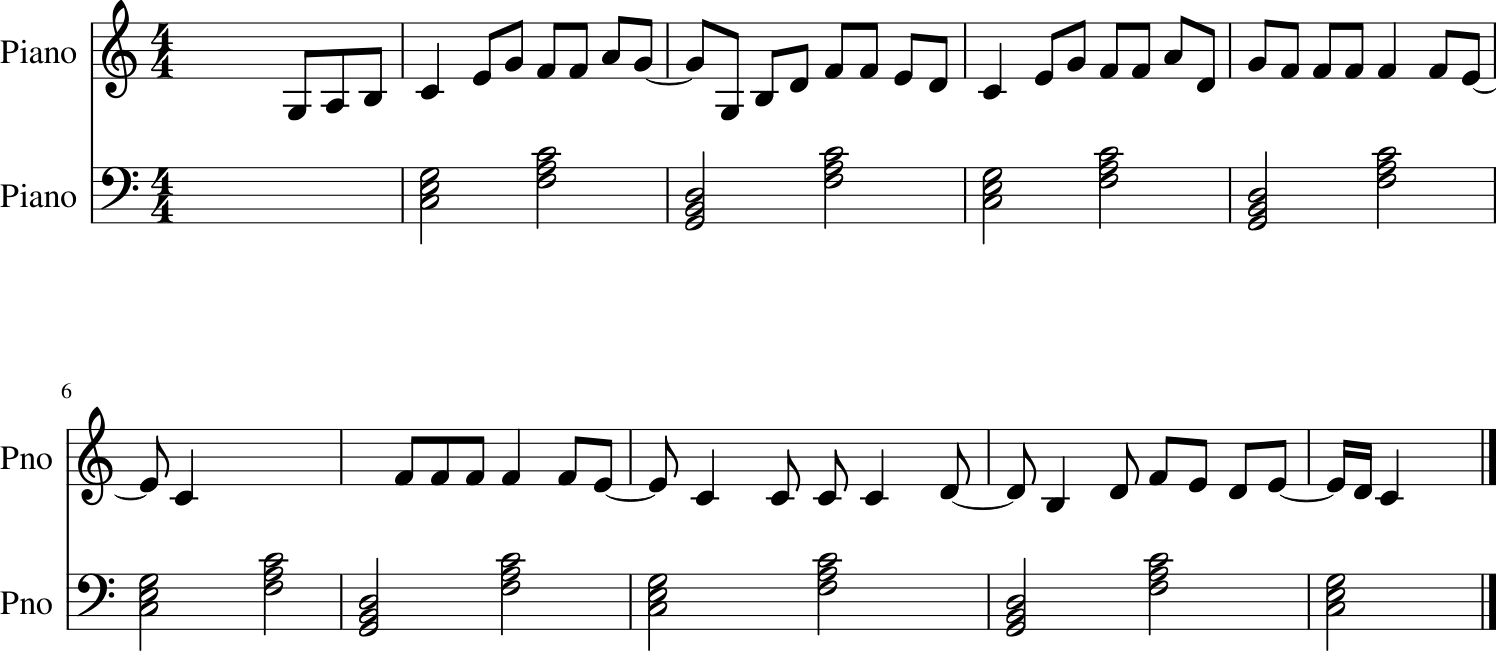

In [20]:
chordarr2stream(chordarr).show()

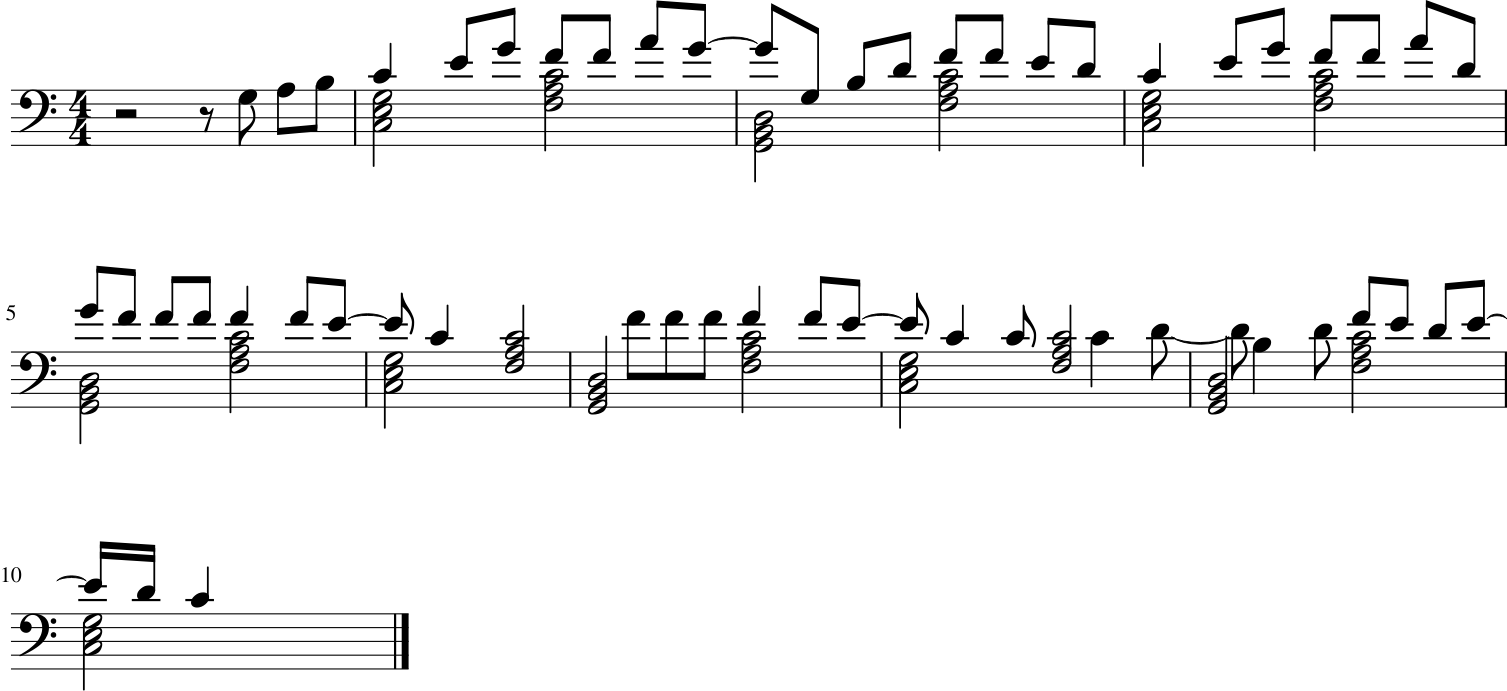

In [19]:
chordarr2stream(renc_chordarr).show()

In [34]:
npenc.shape

(161, 2)

In [30]:
npenc[:10]

array([[-1, 10],
       [55,  2],
       [-1,  2],
       [57,  2],
       [-1,  2],
       [59,  2],
       [-1,  2],
       [60,  4],
       [55,  8],
       [52,  8]])

## Original

In [47]:
stream = file2stream(orig) # 1.
s_arr = stream2chordarr(stream) # 2.
seq = chordarr2seq(s_arr) # 3.
npenc = seq2npenc(seq)

In [48]:
reenc_seq = npenc2seq(npenc)
reenc_chordarr = seq2chordarr(reenc_seq)

In [49]:
reenc_chordarr.shape

(147, 1, 128)

## Testing

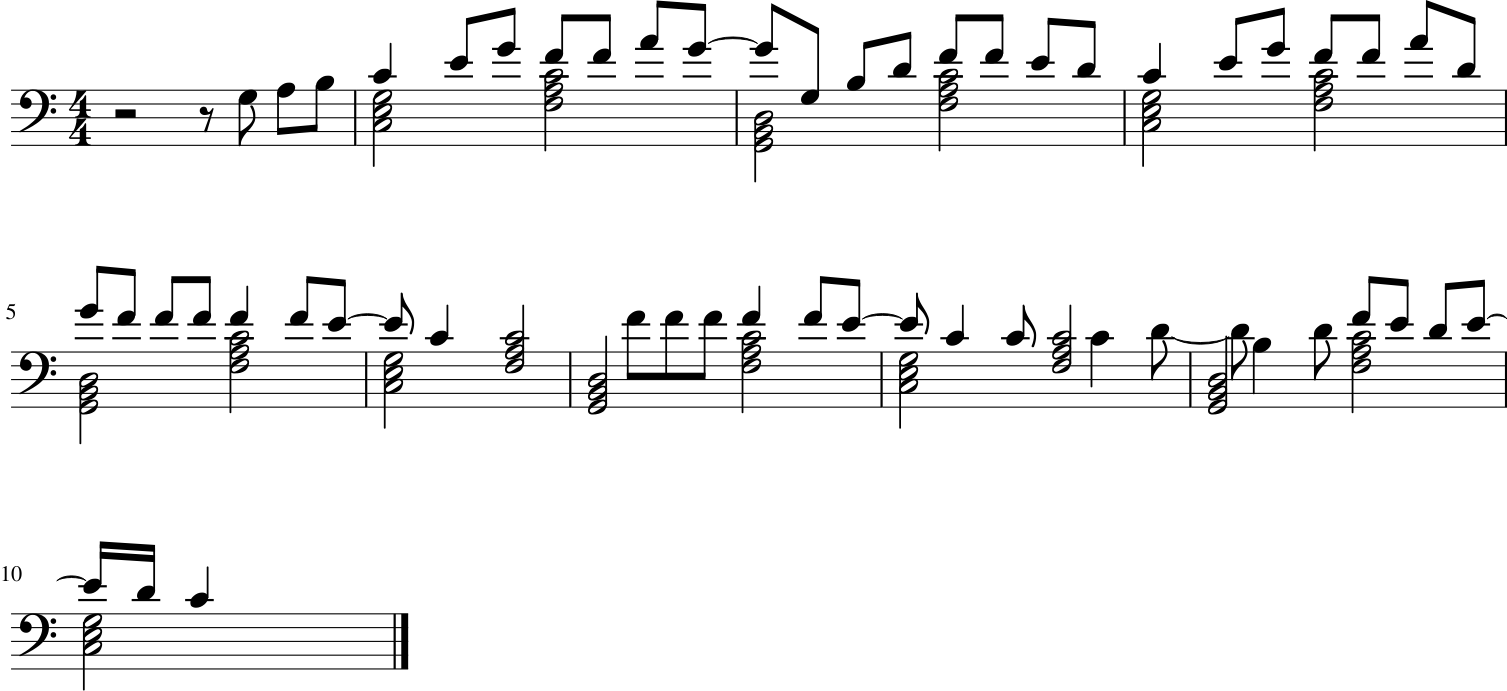

In [31]:
chordarr2stream(npenc2chordarr(npenc)).show()

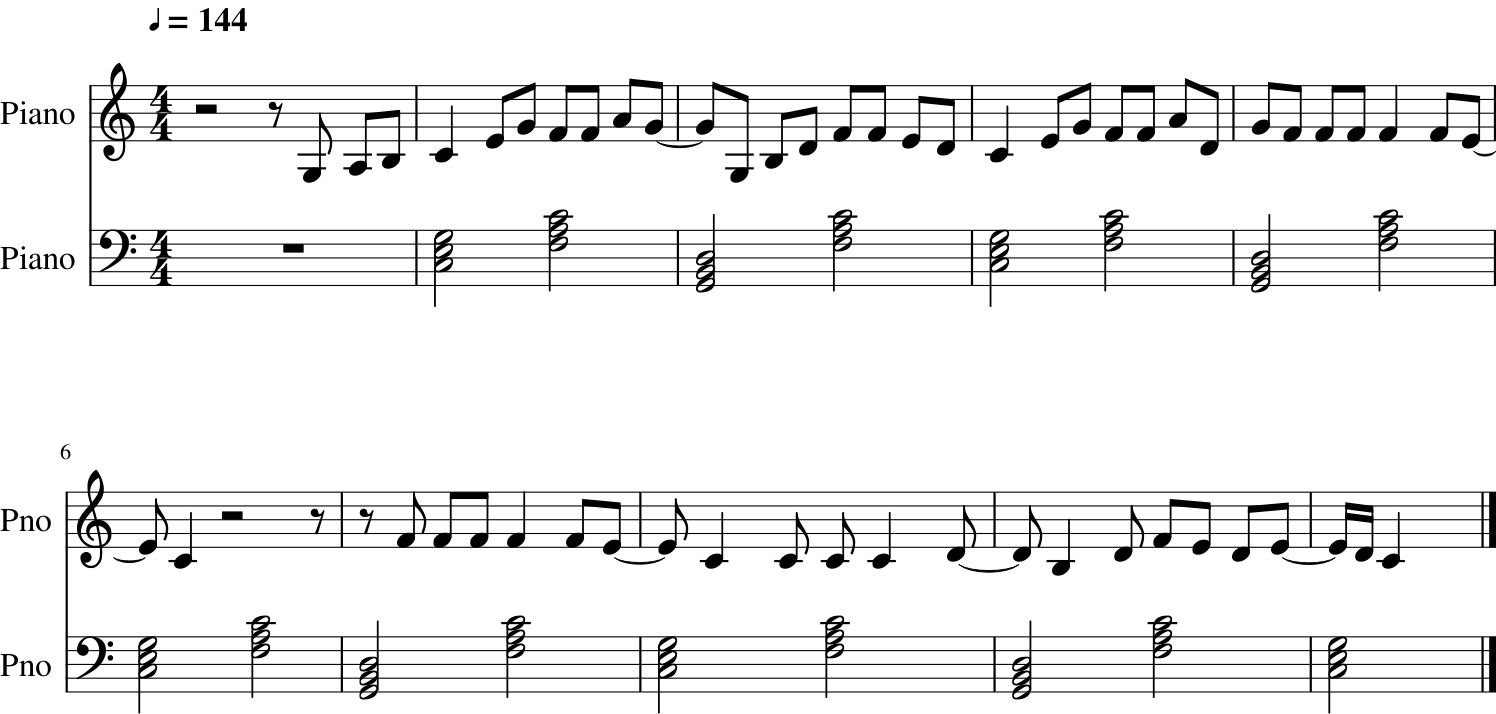

In [32]:
file2stream(orig).show()